# 쇼핑몰 리뷰 평점 분류 경진대회 베이스라인

이번 대회는 쇼핑몰 리뷰 데이터를 통해 평점을 분류하는 대회입니다.

1, 2, 4, 5의 분류하는 간단한 대회 처럼 보이지만,   
자연어 처리를 처음 접하는 분들에게는 어디부터 시작해야 하는지 막막하실 겁니다.

베이스라인을 통해 자연어 처리 기초에 입문해보세요!

# 데이터 불러오기

먼저 분석하려는 데이터를 작업장으로 가져오는 작업이 필요합니다.

이를 위해서 파이썬 라이브러리 중 하나인 Pandas를 이용합니다.

pandas 라이브러리는 엑셀과 같은 행과 열로 이루어진 테이블(table) 형식의 데이터를 편하게 다루도록 해주는 라이브러리입니다.

데이터 분석에는 반드시 사용된다고 해도 과언이 아닌 라이브러리이니, 시간이 날때마다 공부해둡시다.

In [1]:
import pandas as pd

#csv 형식의 training 데이터를 로드합니다.
train = pd.read_csv('data/train.csv')

#데이터 살펴보기 위해 데이터 최상단의 5줄을 표시합니다.
train.head() 

,id,reviews,target
0,0,조아요 처음구입 싸게햇어요,2
1,1,생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 25천원가량 주고 사기 너무 ...,1
2,2,디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져...,2
3,3,기전에 이 제품말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다. 샘...,2
4,4,튼튼하고 손목을 잘 받쳐주네요~,5


In [2]:
train.shape

(25000, 3)

# 결측치 확인

결측치(NA: Not Available)란 값이 누락된 데이터를 말합니다.

보다 정확한 분석을 하기 위해서는 데이터의 결측치를 확인하고 적절히 처리해주어야 합니다.

이번 데이터에 결측치가 있나 확인해볼까요?

In [3]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train)

결측치가 존재하지 않습니다


## 모델링

### 변수 정의

이제 본격적으로 모델을 설계하기 위해 데이터를 독립변수(X)와 종속변수(y) 로 나누어 줍니다

우리의 목적은 주어진 쇼핑몰 리뷰 데이터를 이용하여 평점(target)을 예측하는 것입니다.

그럼 가격을 제외한 중고차 리뷰가 X, 평점(target)이 y가 되겠죠?

In [4]:
X = train.reviews #training 데이터에서 피쳐 추출
y = train.target #training 데이터에서 중고차 가격 추출

이렇게 X와 y를 잘 정의해주었습니다.

<br>

### train/vaildation 정의

이제 우리는 모델을 만들어야 하는데,   
모델을 만들기 앞서 내가 만들 모델이 유의미한지 알아야 좋은 결론을 도출 할 수 있겠죠?   

<br> 

하지만 단순히 주어진 데이터로 train셋 데이터를 학습시켜서 목표값인 test 셋에 집어 넣어 예측값을 도출하면,   
모델이 적합한지 알 방법이 없습니다.   

<br> 

따라서 train 셋에서 70%를 학습을 시키는데 쓰고, 나머지 25%를 모델이 유의미한지 검증하는데 사용할 것입니다.   
이후 유의미하다면, 실제로 제출할 모델을 만들 때, train 셋 100%를 학습을 시키면 되겠죠?

<br>

자 그럼 train 셋에서 학습시킬 셋 train_data와 검증할 셋 val_data를 만들어 봅시다!

In [5]:
from sklearn.model_selection import train_test_split

#data = train.drop('id', axis = 1).copy() #필요없는 id열 삭제
train_data, val_data = train_test_split(train, test_size=0.25, stratify = train.target) #25프로로 설정
train_data = train_data.reset_index().drop('index', axis=1) #전처리 과정에서 데이터가 뒤섞이지 않도록 인덱스를 초기화
val_data = val_data.reset_index().drop('index', axis=1)

In [6]:
train_data.head()

,id,reviews,target
0,5568,그냥뭐 그럭저럭 쓸만함 색선택지가 몇개없었는데 색도 다 별로고 옷 살때 배송비때문에...,4
1,24284,버튼이 잘 안눌려요 비추입니다.,1
2,7326,스위치 샤워기헤드의 호스 연결부분 그릴 부분이 깨져있어요,2
3,10869,다들 많이써서 구매했어요 색깔 이뻐요,5
4,15385,통풍시트 주문하면서 여분으로 구입했어요 필터 교체가 쉬워서 좋네요,4


In [7]:
print('학습시킬 train 셋 : ', train_data.shape)
print('검증할 val 셋 : ', val_data.shape)

학습시킬 train 셋 :  (18750, 3)
검증할 val 셋 :  (6250, 3)


In [8]:
train_X = train_data.reviews# training 데이터에서 피쳐 추출
train_y = train_data.target #training 데이터에서 target 추출

val_X = val_data.reviews #training 데이터에서 피쳐 추출
val_y = val_data.target #validation 데이터에서 target 추출

# CountVectorizer 의 이해

컴퓨터는 일반적으로 문장(텍스트)을 계산할 수 없고 숫자형 피처를 데이터로 입력받아 동작하기 때문에 

텍스트와 같은 데이터는 머신러닝 알고리즘에 바로 입력할 수가 없습니다. 

따라서 컴퓨터가 계산을 하기 위해서는 먼저 문장을 숫자형 값으로 바꾼 다음 계산하도록 해야 합니다.

이것을 워드 임베딩(word embedding)이라고 합니다.

이번 베이스라인에서는 CountVectorizer 기법을 사용해 문장을 숫자로 표현해보겠습니다.

CountVectorizer 는 입력된 문장을 토큰화(Tokenize)하여 토큰의 등장 빈도 벡터로 바꿔주는 기법입니다.

토큰화란 문장를 의미가 있는 최소의 단위로 쪼개는 것을 의미합니다.

예를 들어 "hello, I am a data scientist!" 라는 문장을 띄어쓰기 기준으로 토큰화 시키면

"hello", ",", "I", "am", "a", "data", "scientist", "!" 라는 8개의 토큰으로 토큰화 됩니다.

토큰화를 하는 방식은 여러가지가 있지만 이번 베이스라인에서는 띄어쓰기를 기준으로 토큰화를 진행해보겠습니다.

CountVectorizer 사용을 위해 sklearn 패키지에 있는 CountVectorizer 를 불러옵니다.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer #sklearn 패키지의 CountVectorizer import

sample_vectorizer = CountVectorizer() #객체 생성

이제 CounterVectorizer 를 학습 시켜주어야 합니다.

어떠한 단어들을 사용할 지, 어떠한 단어가 중요도를 가지는지 학습하는 과정입니다.

CountVectorizer 의 경우 단어의 출현 빈도를 기준으로 문장을 벡터(=숫자의 집합)로 바꿔줍니다.

In [10]:
sample_text1 = ["hello, my name is dacon and I am a data scientist!"]

sample_vectorizer.fit(sample_text1) #CountVectorizer 학습

CountVectorizer()

이제 학습이 완료되었습니다.

먼저 sample_vectorizer 가 학습한 단어 목록을 확인해보겠습니다.

이를 Vocabulary라고 하며, 앞으로 sample_vectorizer는 이 Vocab을 기준으로 새로운 문장을 숫자로 바꿔줄 것입니다.




In [11]:
print(sample_vectorizer.vocabulary_) #Vocabulary

{'hello': 4, 'my': 6, 'name': 7, 'is': 5, 'dacon': 2, 'and': 1, 'am': 0, 'data': 3, 'scientist': 8}


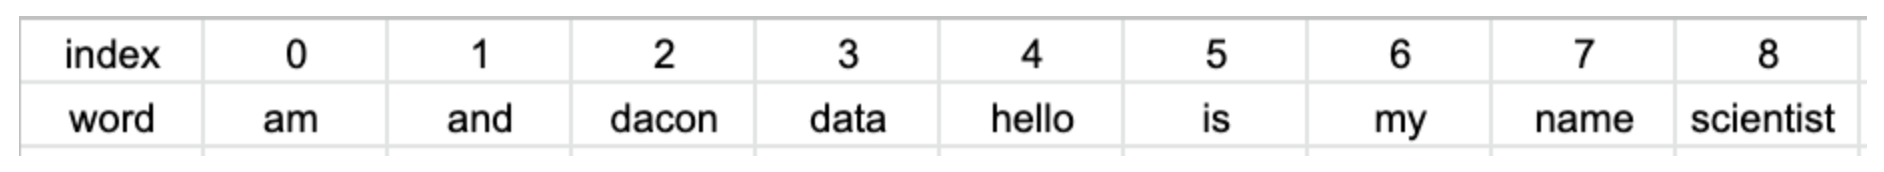

"hello, my name is dacon and I am a data scientist" 문장으로 vectorizer 를 학습 시켰습니다.

sklearn의 CountVectorizer는 "I", "a" 와 같이 길이가 2 이하인 단어들과, ",", !" 같은 특수 문자를 의미가 적다고 판단하여 제외시킵니다.

그래서 최종적으로는 9개의 단어들이 Vocab 에 포함되어있습니다.

그럼 이제 다른 문장을 sample_vectorizer 를 활용해 벡터로 transform 해볼까요?

In [12]:
sample_text2 = ["you are learning dacon data science"]

sample_vector = sample_vectorizer.transform(sample_text2)
print(sample_vector.toarray())

[[0 0 1 1 0 0 0 0 0]]


"you are learning dacon data science" 문장을 sample_vectorizer 를 활용해 transform 해보았습니다.

단어들의 출현 빈도로 이루어진 크기 9의 백터가 출력되었습니다. 이 벡터를 BoW 라고 합니다.

BoW 란 "Bag of Words" 의 약자로 CountVectorizer 로 변환된 단어의 집합을 말합니다

특정 단어가 N번 등장했다면, 그 특정 단어가 N개가 들어있습니다. 

또한 단어를 섞었기 때문에 더 이상 단어의 순서는 중요하지 않습니다.

BoW를 만드는 과정은 이렇게 두 가지 과정이 있습니다.

(1) 우선 각 단어에 고유한 정수 인덱스를 부여합니다.

(2) 각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터를 만듭니다.

sample_text2 문장 내에는 "dacon", "data" 단어가 각 1번 씩 출현했습니다.

따라서 "dacon" 과 "data" 에 해당하는 인덱스의 값이 1로 표시되어 있고, 등장하지 않은 단어들은 0으로 표시되어 있습니다.

In [13]:
sample_text3 = ["you are learning dacon data science with news data"]

sample_vector2 = sample_vectorizer.transform(sample_text3)
print(sample_vector2.toarray())

[[0 0 1 2 0 0 0 0 0]]


"you are learning dacon data science with news data" 문장에는 "dacon" 단어가 1번, "data" 단어가 2번 출현했습니다.

따라서 "dacon" 단어에 해당하는 인덱스에는 1의 값이, "data" 에 해당하는 인덱스에는 2의 값이 할당되었습니다.

CountVectorizer 는 위와 같이 작동합니다.

이해를 위해 CountVectorizer 를 하나의 문장을 사용해 학습 시켰기에 생성된 Vocab과 BoW 의 크기는 모두 9 였습니다.

하지만 더 큰 데이터를 사용해 CountVectorizer 를 학습시킨다면 Vocab과 Bow 의 크기는 더욱 증가할 것입니다.

이처럼 BoW는 각 단어가 등장한 횟수를 수치화하는 텍스트 표현 방법이기 때문에, 

주로 어떤 단어가 얼마나 등장했는지를 기준으로 문서가 어떤 성격의 문서인지를 판단하는 작업에 쓰입니다. 

즉, 분류 문제나 여러 문서 간의 유사도를 구하는 문제에 주로 쓰입니다.

## 쇼핑몰 리뷰 데이터 CountVectorizer 적용

먼저 새로운 객체를 생성하여 CountVectorizer 를 할당해 줍니다.

다음 미리 준비해두었던 데이터를 사용해 CountVectorizer 를 학습 시켜줍니다.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer #sklearn 패키지의 CountVectorizer import

vectorizer = CountVectorizer() #countvectorizer 생성
vectorizer.fit(train_X) #countvectorizer 학습
train_X = vectorizer.transform(train_X) #transform
val_X = vectorizer.transform(val_X)

이제 CountVectorizer 를 학습 시켰습니다.

X 는 이제 자연어가 아닌 숫자형 백터 데이터로 이루어져 있습니다.

이제는 머신러닝 모델의 input 값으로 적절한 데이터의 형식을 갖춘 것입니다!

역변환을 통하여 문장의 단어들을 확인할 수도 있습니다.

In [15]:
vectorizer.inverse_transform(train_X[0]) #역변환하여 첫번째 문장의 단어들 확인

[array(['그냥뭐', '그럭저럭', '몇개없었는데', '배송비때문에', '별로고', '사지말껄', '산건데', '살때',
        '색도', '색선택지가', '쓸만함', '하나'], dtype='<U100')]

# Logistic Regression

분류 문제를 효과적으로 잘 처리할 수 있는 알고리즘은 로지스틱 회귀, 선형 서포트 벡터 머신, 나이브 베이즈 등이 있습니다.

이중에서 LogisticRegression 모델을 사용하여 뉴스의 토픽을 분류해보겠습니다.

예측하고자 하는 것이 연속적인 값을 갖는 수치 형태가 아닌, 1 단위로 끊어지는 분류 문제이기 때문에

category를 분류할 때 사용하는 LogisticRegression을 이용하여 진행하도록 하겠습니다.

In [16]:
from sklearn.linear_model import LogisticRegression #모델 불러오기
model = LogisticRegression(max_iter=500) #객체에 모델 할당
model.fit(train_X, train_y) #모델 학습

LogisticRegression(max_iter=500)

굉장히 간단하게 학습이 끝났습니다.

모델이 실제로 데이터를 얼마나 잘 맞추는지 확인해보기 위하여 예측값을 생성해 봅시다.

In [17]:
from sklearn.metrics import accuracy_score

#run model
y_pred = model.predict(val_X)

평가 지표로는 분류 문제이므로 ACCURACY를 사용하겠습니다.

In [18]:
# 먼저 점수를 메기는 방법인 평가 지표(Metric)를 정의합니다.
import numpy as np

def ACCURACY(true, pred):   
    score = np.mean(true==pred)
    return score

In [19]:
# 모델의 예측과 실제 정답값을 비교합니다.

score = ACCURACY(val_y, y_pred)

print(f"모델의 정확도는 {score*100:.2f}% 입니다")

모델의 정확도는 60.40% 입니다


## 데이터 편차 확인

그럼 실제로 예측 결과를 분석해서 우리가 설계한 모델이 어떤 부분에 취약한지 찾아봅시다.

우선 단순히 예측을 1, 2, 4, 5 평점 중 몇으로 분류하였는지 갯수를 살펴보겠습니다. 

In [20]:
from collections import Counter

pred_cnt = Counter(y_pred)
true_cnt = Counter(val_y)

for key in sorted(true_cnt.keys()):
    print(f"{key} 값 예측 개수: {pred_cnt[key]}개, 실제 값 개수: {true_cnt[key]}개, 비율: {pred_cnt[key]/true_cnt[key]*100:.2f}%")

1 값 예측 개수: 618개, 실제 값 개수: 1125개, 비율: 54.93%
2 값 예측 개수: 2635개, 실제 값 개수: 2000개, 비율: 131.75%
4 값 예측 개수: 160개, 실제 값 개수: 625개, 비율: 25.60%
5 값 예측 개수: 2837개, 실제 값 개수: 2500개, 비율: 113.48%


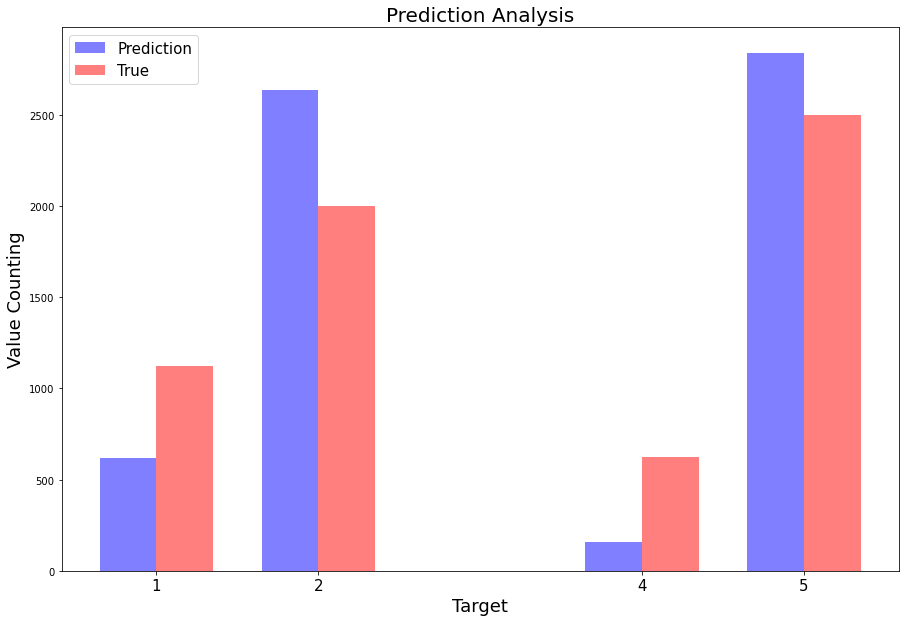

In [21]:
import matplotlib.pyplot as plt

index = sorted(true_cnt.keys())
pred_val = [pred_cnt[key] for key in index]
true_val = [true_cnt[key] for key in index]

plt.figure(figsize=(15,10))
bar_width = 0.35
p1 = plt.bar([idx-bar_width/2 for idx in index], pred_val, 
             bar_width, 
             color='b', 
             alpha=0.5)
p2 = plt.bar([idx+bar_width/2 for idx in index], true_val, 
             bar_width, 
             color='r', 
             alpha=0.5)
plt.title('Prediction Analysis', fontsize=20)
plt.ylabel('Value Counting', fontsize=18)
plt.xlabel('Target', fontsize=18)
plt.xticks(index, fontsize=15)
plt.legend((p1[0], p2[0]), ('Prediction', 'True'), fontsize=15)
plt.show()

예측과 실제 값 개수의 비율을 살펴보면, 2, 4에서는 100%가 넘게 예측한 값이 많습니다.
이는 잘못 예측한 결과까지 포함했기 때문입니다.

이 분석에서 알 수 있는 것은 이 모델이 **2와 4를 매우 좋아하고 1과 2를 아주 싫어하는 것** 같습니다.

그럼 이번엔 정답을 예측한 결과를 바탕으로 이 모델의 정확도를 분석해보겠습니다.

In [22]:
from collections import Counter

accurate = val_y[val_y==y_pred]
print("정답을 맞춘 개수 :", len(accurate))


# ... 1번 코드를 아래에 작성하세요 ...
accu_cnt = Counter(accurate)
true_cnt = Counter(val_y)

for key in sorted(true_cnt.keys()):
    print(f"{key} 값 예측 개수: {accu_cnt[key]}개, 실제 값 개수: {true_cnt[key]}개, 정답률: {accu_cnt[key]/true_cnt[key]*100:.2f}%")

정답을 맞춘 개수 : 3775
1 값 예측 개수: 298개, 실제 값 개수: 1125개, 정답률: 26.49%
2 값 예측 개수: 1433개, 실제 값 개수: 2000개, 정답률: 71.65%
4 값 예측 개수: 42개, 실제 값 개수: 625개, 정답률: 6.72%
5 값 예측 개수: 2002개, 실제 값 개수: 2500개, 정답률: 80.08%


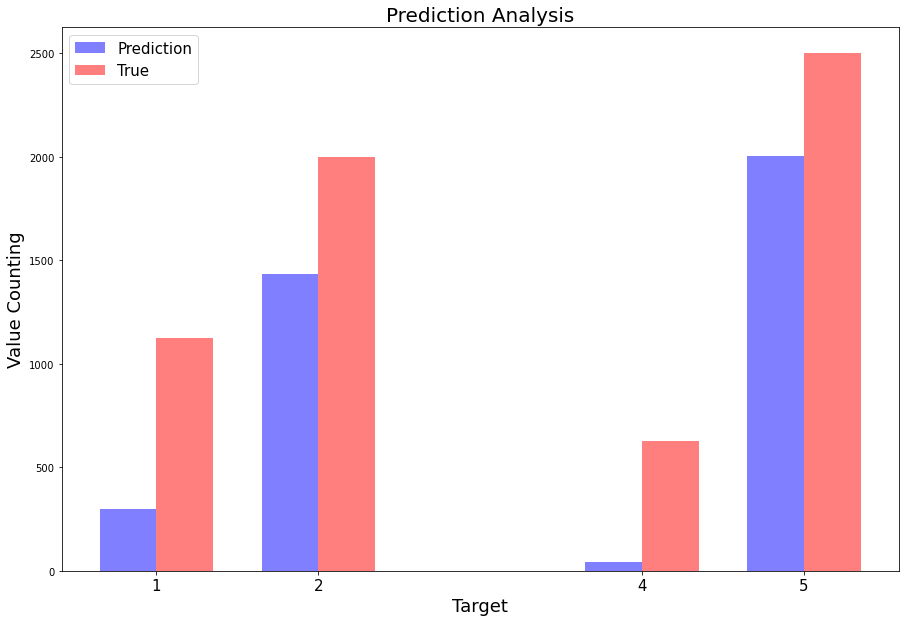

In [23]:
import matplotlib.pyplot as plt

index = sorted(true_cnt.keys())
accu_val = [accu_cnt[key] for key in index]
true_val = [true_cnt[key] for key in index]

plt.figure(figsize=(15,10))
bar_width = 0.35
p1 = plt.bar([idx-bar_width/2 for idx in index], accu_val, 
             bar_width, 
             color='b', 
             alpha=0.5)
p2 = plt.bar([idx+bar_width/2 for idx in index], true_val, 
             bar_width, 
             color='r', 
             alpha=0.5)
plt.title('Prediction Analysis', fontsize=20)
plt.ylabel('Value Counting', fontsize=18)
plt.xlabel('Target', fontsize=18)
plt.xticks(index, fontsize=15)
plt.legend((p1[0], p2[0]), ('Prediction', 'True'), fontsize=15)
plt.show()

예측 개수와 실제 값 개수를 살펴보면, 1는 정답률이 27.6%,      
4는 정답률이 8.7% 정도 밖에 정확도를 나타냈다는 것을 확인해볼 수 있습니다.

또한 앞서 2, 5의 평점으로 예측한 값이 정답률(비율)이 낮아진 것으로 보아,    
1, 4의 평점으로 분류되어야 할 데이터가 2, 5의 평점으로 분류되었다는 것을 고려해볼 수 있겠습니다. 

이는 평점 1, 4 데이터의 개수가 적어 데이터 불균형이 심하기 때문에     
1, 4의 평점에서 모델이 제대로 예측하지 못한다고 볼 수 있겠습니다.

이를 해결하기 위하여 data를 증강시키거나 적은 양의 클래스를 따로 맞추는 모델을 만들어보는 등의 시도를 해볼 수 있을것 같습니다.

이에 대한 자세한 내용은 베이스라인2에서 살펴보겠습니다.

### train 셋 + val 셋 100% 활용하는 모델 만들기

이제 검증 셋으로 성능이 유의미한지 확인을 하였다면 데이터를 100% 활용하기 위하여   
검증 셋을 포함한 train 셋을 만들어보겠습니다.

In [24]:
vectorizer = CountVectorizer() #countvectorizer 생성
vectorizer.fit(X) #countvectorizer 학습
X = vectorizer.transform(X) #transform

In [25]:
model = LogisticRegression(max_iter=500) #객체에 모델 할당
model.fit(X, y) #모델 학습

LogisticRegression(max_iter=500)

이제 모델 학습이 완료되었습니다!

모델이 잘 학습되었는지 X의 첫번쨰 문장을 모델에 넣어보도록 하겠습니다.

In [26]:
from sklearn.metrics import accuracy_score

#run model
y_pred = model.predict(X[0])
print('예측 라벨 : ', y_pred)
print('실제 라벨 : ', train.target[0])

예측 라벨 :  [2]
실제 라벨 :  2


In [27]:
vectorizer.inverse_transform(X[0]) #역변환하여 첫번째 문장의 단어들 확인

[array(['싸게햇어요', '조아요', '처음구입'], dtype='<U100')]

X의 첫번째 문장은 5의 평점으로 잘 학습되어 분류된 것을 확인해 볼 수 있습니다.

## 예측하기

이제 학습된 모델을 이용하여 주어진 test데이터로 예측을 진행해 보겠습니다.

앞서 train 셋에서 했던 동일한 전처리 과정을 거치되, data leakage가 발생하지 않도록 주의합니다.

In [28]:
test = pd.read_csv("data/test.csv") #파일 읽기
test.head() #파일 확인

,id,reviews
0,0,채소가 약간 시들어 있어요
1,1,발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리고 힘이없어서 들어 올리...
2,2,부들부들 좋네요 입어보고 시원하면 또 살게요
3,3,이런 1. 8 골드 주라니깐 파란개 오네 회사전화걸어도 받지도 않고 머하자는거임?
4,4,검수도 없이 보내구 불량 배송비 5000원 청구하네요 완전별로 별하나도 아까워요


이제 test 데이터를 transform 합니다. 그 후 test 데이터의 label 을 예측합니다.

In [29]:
test_X = test.reviews #문서 데이터 생성

test_X_vect = vectorizer.transform(test_X) #문서 데이터 transform 
#test 데이터를 대상으로 fit_transform 메소드를 실행하는 것은 test 데이터를 활용해 vectorizer 를 학습 시키는 것으롤 data leakage 에 해당합니다.

pred = model.predict(test_X_vect) #test 데이터 예측
print(pred)

[5 2 5 ... 2 5 1]


# Dacon 대회 제출

이제 예측한 값으로 제출 파일을 생성해 봅시다.

In [30]:
submission = pd.read_csv("data/sample_submission.csv") #제출용 파일 불러오기
submission.head() #제출 파일이 잘 생성되었는지 확인

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [31]:
submission["target"] = pred #예측 값 넣어주기
submission.head() # 데이터가 잘 들어갔는지 확인합니다.

,id,target
0,0,5
1,1,2
2,2,5
3,3,2
4,4,1


In [32]:
# submission을 csv 파일로 저장합니다.
# index=False란 추가적인 id를 부여할 필요가 없다는 뜻입니다. 
# 정확한 채점을 위해 꼭 index=False를 넣어주세요.
submission.to_csv("data/saved/submit1.csv",index=False)

OSError: Cannot save file into a non-existent directory: 'data/saved'

이렇게 생성된 submit1.csv 파일을 데이콘 대회 페이지에 업로드 & 제출하여 결과를 확인하세요.

축하합니다! 자연어 처리를 완료하셨습니다! 자연어 처리의 첫걸음을 떼신 것을 축하드립니다.

앞으로도 데이콘과 함께 즐겁게 데이터 분석 능력을 키워가시면 좋겠습니다.

감사합니다.

In [5]:
!nvidia-smi

Mon Jun 27 10:29:57 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 440.33.01    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-PCIE...  On   | 00000000:00:06.0 Off |                    0 |
| N/A   37C    P0   144W / 250W |  11182MiB / 32510MiB |     58%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-PCIE...  On   | 00000000:00:07.0 Off |                    0 |
| N/A   22C    P0    25W / 250W |     12MiB / 32510MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
        